# E3.B - Task

In [73]:
reset -f

In [74]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Math, Latex

## Define symbolic variables

In [75]:
L, q0, x, x1, x2, x3 = sp.symbols('L, q0, x, x1, x2, x3', real = 'True')
Ax, Ay, Az, MAx, MAy, MAz = sp. symbols('Ax, Ay, Az, MAx, MAy, MAz', real = 'True')

## Derive q(x)

In [76]:
def q(xL,xH):
    return sp.integrate(q0/L * x, (x, xL, xH))

In [77]:
eq1 = sp.Eq(0 , Ax)
eq2 = sp.Eq(0 , Ay - q(0,L))
eq3 = sp.Eq(0, Az)
eq4 = sp.Eq(0, MAx + q(0, L)*L)
eq5 = sp.Eq(0, MAy)
eq6 = sp.Eq(0, MAz - q(0,L) * 2*L/3)

In [78]:
sol = sp.solve([eq1, eq2, eq3, eq4, eq5, eq6],[Ax, Ay, Az, MAx, MAy, MAz])
sol

{Ax: 0, Ay: L*q0/2, Az: 0, MAx: -L**2*q0/2, MAy: 0, MAz: L**2*q0/3}

In [79]:
Ax, Ay, Az, MAx, MAy, MAz = sol.values()

# Internal force reactions

## Define symbolic functions

In [80]:
Nx1 = sp.Function('Nx1')(x1)
Nx2 = sp.Function('Nx2')(x2)
Nx3 = sp.Function('Nx3')(x3) 

Qy1 = sp.Function('Qy1')(1)
Qy2 = sp.Function('Qy2')(2)
Qy3 = sp.Function('Qy3')(3) 

Qz1 = sp.Function('Qz1')(x1)
Qz2 = sp.Function('Qz2')(x2)
Qz3 = sp.Function('Qz3')(x3) 

Mtx1 = sp.Function('Mtx1')(x1)
Mtx2 = sp.Function('Mtx2')(x2)
Mtx3 = sp.Function('Mtx3')(x3) 

Mby1 = sp.Function('Mby1')(x1)
Mby2 = sp.Function('Mby2')(x2)
Mby3 = sp.Function('Mby3')(x3) 

Mbz1 = sp.Function('Mbz1')(x1)
Mbz2 = sp.Function('Mbz2')(x2)
Mbz3 = sp.Function('Mbz3')(x3) 


## Set up equations

In [81]:
eq11 = sp.Eq(0, Nx1 + Ax) 
eq12 = sp.Eq(0, Qy1 + Ay)
eq13 = sp.Eq(0, Qz1 + Az)
eq14 = sp.Eq(0, Mtx1 + MAx)
eq15 = sp.Eq(0, Mby1 + MAy + Az*x1)
eq16 = sp.Eq(0, Mbz1 + MAz - Ay*x1)

eq21 = sp.Eq(0, Nx2 + Az)
eq22 = sp.Eq(0, Qy2 + Ay)
eq23 = sp.Eq(0, Qz2 - Ax)
eq24 = sp.Eq(0, Mtx2 - Ay*L + MAz)
eq25 = sp.Eq(0, Mby2 - Ax*x2 + MAy)
eq26 = sp.Eq(0, Mbz2 - Ay*x2 - MAx)

eq31 = sp.Eq(0, -Nx3)
eq32 = sp.Eq(0, -Qy3 - q(0, L-x3))
eq33 = sp.Eq(0, -Qz3)
eq34 = sp.Eq(0, -Mtx3)
eq35 = sp.Eq(0, -Mby3)
eq36 = sp.Eq(0, -Mbz3 - q(0, L-x3) * x3*1/3)

# solve equations

In [82]:
sol = sp.solve([eq11, eq12, eq13, eq14, eq15, eq16, eq21, eq22, eq23, eq24, eq25, eq26, eq31, eq32, eq33, eq34, eq35, eq36],[Nx1, Qy1, Qz1, Mtx1, Mby1, Mbz1, Nx2, Qy2, Qz2, Mtx2, Mby2, Mbz2, Nx3, Qy3, Qz3, Mtx3, Mby3, Mbz3])
sol

{Nx1(x1): 0,
 Qy1(1): -L*q0/2,
 Qz1(x1): 0,
 Mtx1(x1): L**2*q0/2,
 Mby1(x1): 0,
 Mbz1(x1): -L**2*q0/3 + L*q0*x1/2,
 Nx2(x2): 0,
 Qy2(2): -L*q0/2,
 Qz2(x2): 0,
 Mtx2(x2): L**2*q0/6,
 Mby2(x2): 0,
 Mbz2(x2): -L**2*q0/2 + L*q0*x2/2,
 Nx3(x3): 0,
 Qy3(3): (-L**2*q0 + 2*L*q0*x3 - q0*x3**2)/(2*L),
 Qz3(x3): 0,
 Mtx3(x3): 0,
 Mby3(x3): 0,
 Mbz3(x3): (-L**2*q0*x3 + 2*L*q0*x3**2 - q0*x3**3)/(6*L)}

In [83]:
Nx1, Qy1, Qz1, Mtx1, Mby1, Mbz1, Nx2, Qy2, Qz2, Mtx2, Mby2, Mbz2, Nx3, Qy3, Qz3, Mtx3, Mby3, Mbz3 = sol.values()

In [84]:
Nx1 = Nx1.subs([(q0, 0.3), (L, 1)])
Qy1 = Qy1.subs([(q0, 0.3), (L, 1)])
Qz1 = Qz1.subs([(q0, 0.3), (L, 1)])
Mtx1 = Mtx1.subs([(q0, 0.3), (L, 1)])
Mby1 = Mby1.subs([(q0, 0.3), (L, 1)])
Mbz1 = Mbz1.subs([(q0, 0.3), (L, 1)])

Nx2 = Nx2.subs([(q0, 0.3), (L, 1)])
Qy2 = Qy2.subs([(q0, 0.3), (L, 1)])
Qz2 = Qz2.subs([(q0, 0.3), (L, 1)])
Mtx2 = Mtx2.subs([(q0, 0.3), (L, 1)])
Mby2 = Mby2.subs([(q0, 0.3), (L, 1)])
Mbz2 = Mbz2.subs([(q0, 0.3), (L, 1)])

Nx3 = Nx3.subs([(q0, 0.3), (L, 1)])
Qy3 = Qy3.subs([(q0, 0.3), (L, 1)])
Qz3 = Qz3.subs([(q0, 0.3), (L, 1)])
Mtx3 = Mtx3.subs([(q0, 0.3), (L, 1)])
Mby3 = Mby3.subs([(q0, 0.3), (L, 1)])
Mbz3 = Mbz3.subs([(q0, 0.3), (L, 1)])

In [85]:
Nx1_fun = sp.lambdify(x1, Nx1, 'numpy')
Qy1_fun = sp.lambdify(x1, Qy1, 'numpy')
Qz1_fun = sp.lambdify(x1, Qz1, 'numpy')
Mtx1_fun = sp.lambdify(x1, Mtx1, 'numpy')
Mby1_fun = sp.lambdify(x1, Mby1, 'numpy')
Mbz1_fun = sp.lambdify(x1, Mbz1, 'numpy')

Nx2_fun = sp.lambdify(x2, Nx2, 'numpy')
Qy2_fun = sp.lambdify(x2, Qy2, 'numpy')
Qz2_fun = sp.lambdify(x2, Qz2, 'numpy')
Mtx2_fun = sp.lambdify(x2, Mtx2, 'numpy')
Mby2_fun = sp.lambdify(x2, Mby2, 'numpy')
Mbz2_fun = sp.lambdify(x2, Mbz2, 'numpy')

Nx3_fun = sp.lambdify(x3, Nx3, 'numpy')
Qy3_fun = sp.lambdify(x3, Qy3, 'numpy')
Qz3_fun = sp.lambdify(x3, Qz3, 'numpy')
Mtx3_fun = sp.lambdify(x3, Mtx3, 'numpy')
Mby3_fun = sp.lambdify(x3, Mby3, 'numpy')
Mbz3_fun = sp.lambdify(x3, Mbz3, 'numpy')

In [92]:
s = np.linspace(0,1,10)

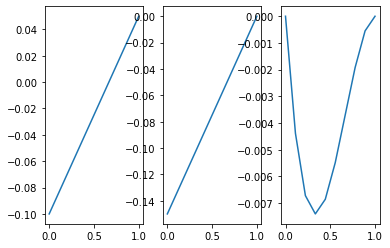

In [91]:
    f, (ax1, ax2, ax3) = plt.subplots(1, 3)
    ax1.plot(s, Mbz1_fun(s))
    ax2.plot(s, Mbz2_fun(s))
    ax3.plot(s, Mbz3_fun(s))